In [1]:
using Plots, SpecialFunctions, Random, NLopt,Distributions, Interpolations, Dierckx,LaTeXStrings
gr()

Plots.GRBackend()

In [2]:
function model(L,Δ,T,Ub,a)
    N=Int(2L/Δ)+1
    xloc=zeros(N)
    for i in 1:N
    xloc[i]=-L+(i-1)*Δ
    end
    y=zeros(N)
    c(x)=Ub+a[1]*(erf((a[2]-(x-a[4]*T))/sqrt(4*a[3]*T))+erf((a[2]+(x-a[4]v*T))/sqrt(4*a[3]*T)))/2;  
    for i in 1:N 
    y[i] = c(xloc[i])
    end 
    return y
    end

model (generic function with 1 method)

In [3]:
function loglhood(data,a,Ub,L,Δ,T,xloc,σ) 
    y=zeros(Int(2*L/Δ)+1) 
    y=model(L,Δ,T,Ub,a)
    ℓ=0.0
    data_dists=[Normal(0,σ) for mi in y];
    ℓ+=sum([loglikelihood(data_dists[i],data[i]-y[i]) for i in 1:length(data_dists)]) 
    return ℓ
    end   

loglhood (generic function with 1 method)

In [4]:
a=zeros(4)
function funmle(a)
return loglhood(data,a,Ub,L,Δ,T,xloc,σ)
end

funmle (generic function with 1 method)

In [5]:
function Optimise(fun,θ₀,lb,ub)    
    tomax=(θ,∂θ)->fun(θ)
    opt=Opt(:LN_NELDERMEAD,length(θ₀))
    opt.max_objective=tomax
    opt.lower_bounds=lb      
    opt.upper_bounds=ub
    opt.maxtime=1*60
    res = optimize(opt,θ₀)
    return res[[2,1]]
end

Optimise (generic function with 1 method)

In [6]:
L=200
Δ=5
N =Int(2L/Δ)+1
xloc=zeros(N)
for i in 1:N
xloc[i]=-L+(i-1)*Δ
end

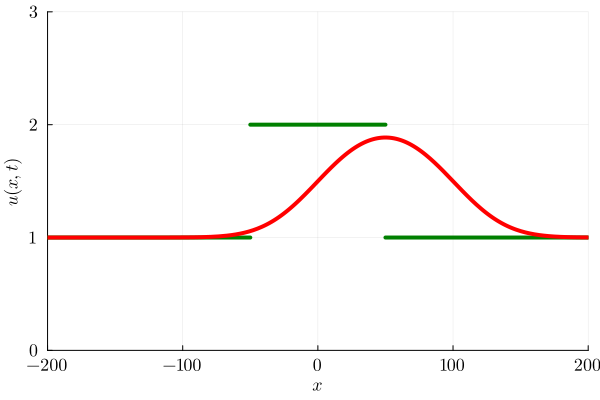

In [7]:
D=10.0
v=1.0
T=50
Ub=1.0
U0=1.0
h=50
σ=1.0/20
f(x)=Ub
g(x)=Ub+U0
p1=plot(f,-L,-h,lw=4,lc=:green,label=false,xlims=(-L,L),ylims=(0,3))
p1=plot!(f,h,L,lw=4,lc=:green,label=false)
p1=plot!(g,-h,h,lw=4,lc=:green,label=false)
u(x)=Ub+U0*(erf((h-(x-v*T))/sqrt(4*D*T))+erf((h+(x-v*T))/sqrt(4*D*T)))/2;
p1=plot!(u,-L,L,lw=4,lc=:red,label=false,xlabel=L"x",ylabel=L"u(x,t)")
p1=plot!(xlims=(-L,L),xticks=([-200,-100,0,100,200],[L"-200",L"-100", L"0", L"100", L"200"]))
p1=plot!(ylims=(0,3),yticks=([0,1,2,3],[L"0", L"1", L"2",L"3"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)


In [8]:
data=[1.0746704200035107
0.9997809477379822
0.9757424595863007
0.9818892671248993
0.9417708005709577
0.969002076526583
0.9913160637355931
0.8878038515243347
1.0198197226589736
0.9974211828246098
1.0805146205871154
0.9161679919462387
0.970326879443432
1.0140484393549576
1.0673792764518402
0.9976045065683884
1.0166341446161276
0.966794550221958
1.033060780390708
1.0297279162356239
1.0421637035845757
0.9544610289017758
0.9420581661953022
1.017640239352237
1.0118294479532317
1.0241821081772111
0.9931867276558649
1.0546221441690116
0.9642581479921727
1.0589964208816462
1.1273046234492679
1.0690098332703886
1.1524384816738436
1.1697400806858214
1.1622237579309098
1.1390886574429542
1.2623805416775193
1.2589102881916183
1.3393589749927486
1.4953486013403088
1.4843625102318858
 1.529199284923832
 1.6056104756265166
 1.639104867809398
 1.6595888873078761
 1.7630697196896132
 1.835615768375447
 1.7765843614827102
 1.8697454780507807
 1.8847084582262323
 1.8523664988882582
 1.8009396841570668
 1.8556831916925527
 1.8510050281633894
 1.746972155093142
 1.7272026936725604
 1.7594774530389148
 1.6630295292350292
 1.692035779430916
 1.564052552272523
 1.5078371058254056
 1.4970973352354653
 1.4120496033555034
 1.3472843464970161
 1.314020409248756
 1.1666589798192746
 1.1889172748718695
 1.091453675175676
 1.0926213080628115
 1.1338847541310328
 0.9763923651812882
 1.0051032221514438
 0.9910155981953401
 1.0317336419556944
 0.9851394734351673
 0.9884599389317271
 1.0908678764438349
 1.0331338603532612
 1.1004696243222967
 1.087821055397088
 0.9327167483496567];

  0.465614 seconds (1.67 M allocations: 64.022 MiB, 96.54% compilation time)


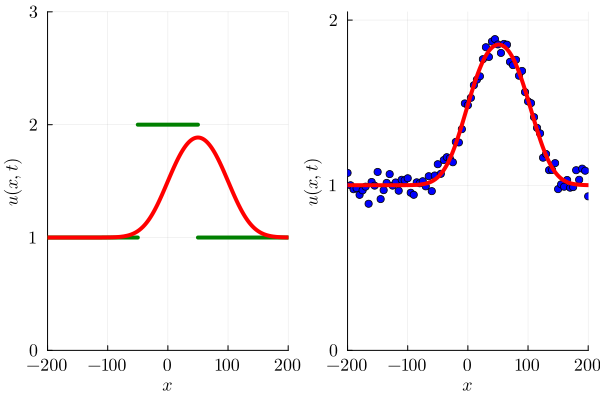

In [9]:
θG=[1.0,45,5,1]
lb=[0,0,0.01,-10]
ub=[10,L,100,10]
@time (xopt,fopt)=Optimise(funmle,θG,lb,ub)
U0mle=xopt[1]
hmle=xopt[2]
Dmle=xopt[3]
vmle=xopt[4]
fmle=fopt
umle(x)=Ub+U0mle*(erf((hmle-(x-vmle*T))/sqrt(4*Dmle*T))+erf((hmle+(x-vmle*T))/sqrt(4*Dmle*T)))/2;
p2=scatter(xloc,data,mc=:blue,msc=:match,label=false)
p2=plot!(umle,-L,L,lw=4,lc=:red,label=false,xlabel=L"x",ylabel=L"u(x,t)",xlims=(-L,L),ylims=(0,U0+Ub+0.1))
p2=plot!(xlims=(-L,L),xticks=([-200,-100,0,100,200],[L"-200",L"-100", L"0", L"100", L"200"]))
p2=plot!(ylims=(0,2.05),yticks=([0,1,2],[L"0", L"1", L"2"]))
p2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p3=plot(p1,p2,layout=(1,2))

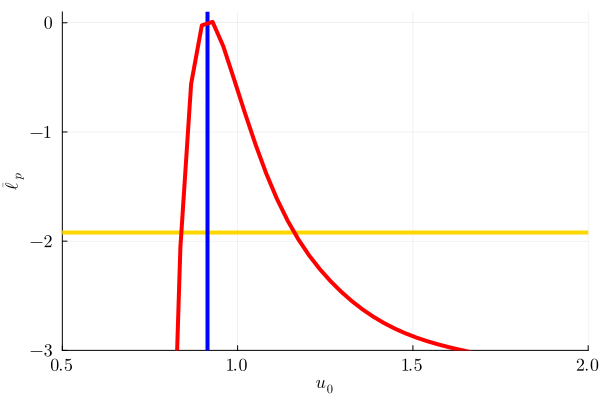

In [10]:
df=1
llstar=-quantile(Chisq(df),0.95)/2

function univariateU0(U0)
    a=zeros(3)    
    function funU0(a)
    return loglhood(data,[U0,a[1],a[2],a[3]],Ub,L,Δ,T,xloc,σ)
    end
    θG=[hmle,Dmle,vmle]
    lb=[0,0.01,0]
    ub=[L,1000,100]
    (xopt,fopt)=Optimise(funU0,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateU0(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
U0range=LinRange(0.5,2.0,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateU0(U0range[i])[1]
end

q1=hline([llstar],legend=false,lw=4,color=:gold)
q1=vline!([U0mle],legend=false,xlabel=L"u_0",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(U0range,ff.-maximum(ff),w=ones(length(U0range)),k=3,bc="nearest",s=0.0005)
yy=evaluate(spl,U0range)
q1=plot!(U0range,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(U0range[1],U0range[end]))
q1=plot!(xlims=(0.5,2.0),xticks=([0.5,1.0,1.5,2.0],[L"0.5",L"1.0", L"1.5", L"2.0"]))
q1=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

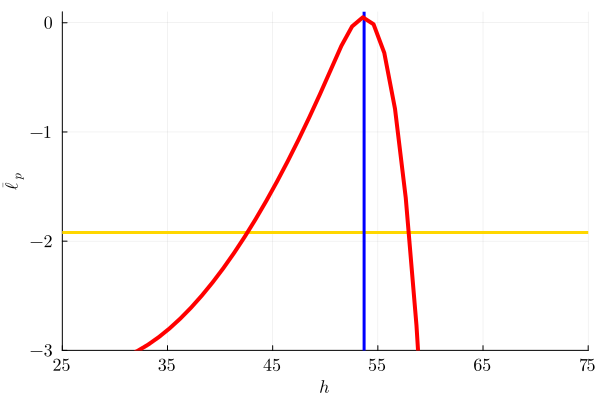

In [11]:
function univariateh(h)
    a=zeros(3)    
    function funh(a)
        return loglhood(data,[a[1],h,a[2],a[3]],Ub,L,Δ,T,xloc,σ)
    end
    θG=[U0mle,Dmle,vmle]
    lb=[0,0.01,0]
    ub=[100,1000,100]
    (xopt,fopt)=Optimise(funh,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateh(x)[1]


M=50;
hrange=LinRange(25,75,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateh(hrange[i])[1]
end

q2=hline([llstar],legend=false,lw=3,color=:gold)
q2=vline!([hmle],legend=false,xlabel=L"h",ylabel=L"\bar{\ell}_p",lw=3,color=:blue)
spl=Spline1D(hrange,ff.-maximum(ff),w=ones(length(hrange)),k=3,bc="nearest",s=0.1)
yy=evaluate(spl,hrange)
q2=plot!(hrange,yy,lw=4,lc=:red,ylims=(-3,0,0.1),xlims=(hrange[1],hrange[end]))
q2=plot!(xlims=(25,75),xticks=([25,35,45,55,65,75],[L"25",L"35", L"45", L"55", L"65", L"75"]))
q2=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

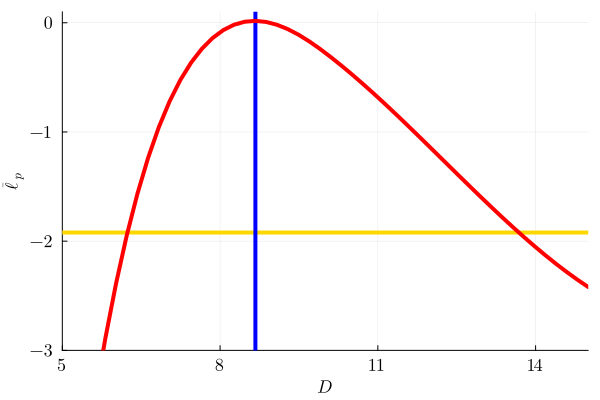

In [12]:
function univariateD(D)
    a=zeros(3)    
    function funD(a)
    return loglhood(data,[a[1],a[2],D,a[3]],Ub,L,Δ,T,xloc,σ)
    end
    θG=[U0mle,hmle,vmle]
    lb=[0,0,0]
    ub=[100,L,100]
    (xopt,fopt)=Optimise(funD,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateD(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
Drange=LinRange(5,15,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateD(Drange[i])[1]
end

q3=hline([llstar],legend=false,lw=4,color="gold")
q3=vline!([Dmle],legend=false,xlabel=L"D",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(Drange,ff.-maximum(ff),w=ones(length(Drange)),k=3,bc="nearest",s=0.01)
yy=evaluate(spl,Drange)
q3=plot!(Drange,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(Drange[1],Drange[end]))
q3=plot!(xlims=(5,15),xticks=([5,8,11,14],[L"5",L"8", L"11", L"14"]))
q3=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

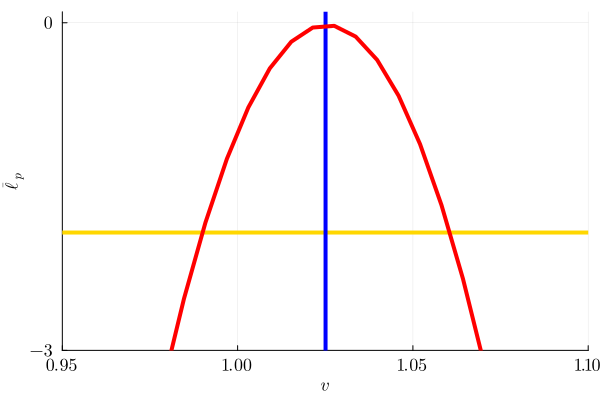

In [13]:
function univariatev(v)
    a=zeros(3)    
    function funv(a)
    return loglhood(data,[a[1],a[2],a[3],v],Ub,L,Δ,T,xloc,σ)
    end     
    θG=[U0mle,hmle,Dmle]
    lb=[0,0,0.01]
    ub=[100,L,1000]
    (xopt,fopt)=Optimise(funv,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariatev(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
vrange=LinRange(0.85,1.15,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariatev(vrange[i])[1]
end

q4=hline([llstar],legend=false,lw=4,color=:gold)
q4=vline!([vmle],legend=false,xlabel=L"v",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(vrange,ff.-maximum(ff),w=ones(length(vrange)),k=3,bc="nearest",s=0.1)
yy=evaluate(spl,vrange)
q4=plot!(vrange,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(vrange[1],vrange[end]))
q4=plot!(xlims=(0.95,1.10),xticks=([0.95,1.00,1.05,1.10],[L"0.95",L"1.00", L"1.05",L"1.10"]))
q4=plot!(ylims=(-3,0.1),yticks=([-3,0],[L"-3", L"0"]))
q4=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

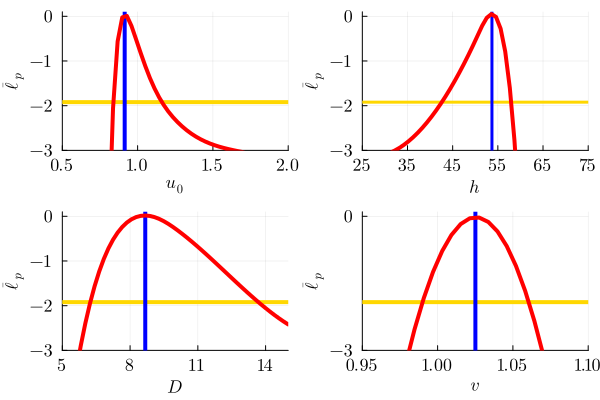

In [14]:
q5=plot(q1,q2,q3,q4,layout=(2,2))

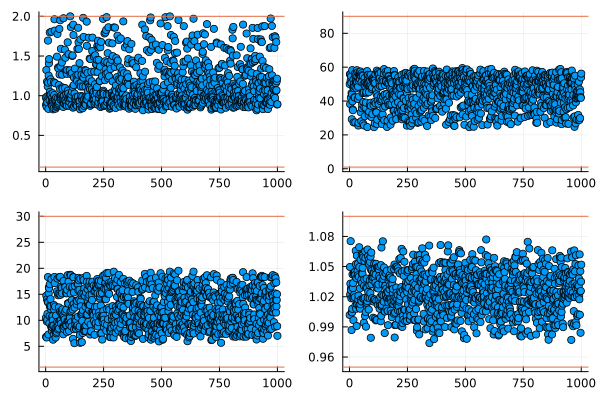

In [15]:
U0min=0.1;
U0max=2.0;
hmin=1;
hmax=90;
Dmin=1;
Dmax=30;
vmin=0.95;
vmax=1.1;

df=4
llstar=-quantile(Chisq(df),0.95)/2
M=1000
Usampled=zeros(M)
hsampled=zeros(M)
Dsampled=zeros(M)
vsampled=zeros(M)
lls=zeros(M)
kount = 0

while kount < M
U0g=rand(Uniform(U0min,U0max))
hg=rand(Uniform(hmin,hmax))
Dg=rand(Uniform(Dmin,Dmax))
vg=rand(Uniform(vmin,vmax))
    if (loglhood(data,[U0g,hg,Dg,vg],Ub,L,Δ,T,xloc,σ)-fmle) >= llstar
    kount+=1
    lls[kount]=loglhood(data,[U0g,hg,Dg,vg],Ub,L,Δ,T,xloc,σ)-fmle
    Usampled[kount]=U0g;
    hsampled[kount]=hg;
    Dsampled[kount]=Dg;
    vsampled[kount]=vg;
    end
end

q1=scatter(Usampled,legend=false)
q1=hline!([U0min,U0max],legend=false)

q2=scatter(hsampled,legend=false)
q2=hline!([hmin,hmax],legend=false)

q3=scatter(Dsampled,legend=false)
q3=hline!([Dmin,Dmax],legend=false)

q4=scatter(vsampled,legend=false)
q4=hline!([vmin,vmax],legend=false)

q4=plot(q1,q2,q3,q4,layout=(2,2))

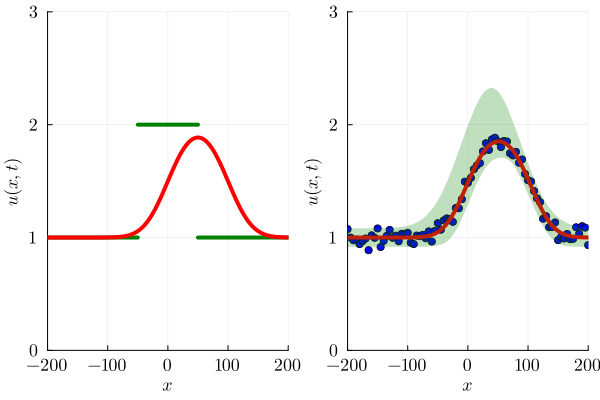

In [16]:
Δf=1
Nf =Int(2L/Δf)+1
xlocf=zeros(Nf)
for i in 1:Nf
xlocf[i]=-L+(i-1)*Δf
end

lower=2*(U0+Ub)*ones(length(xlocf))
upper=zeros(length(xlocf))

for i in 1:M
C(x)=Ub+Usampled[i]*(erf((hsampled[i]-(x-vsampled[i]*T))/sqrt(4*Dsampled[i]*T))+erf((h+(x-vsampled[i]*T))/sqrt(4*Dsampled[i]*T)))/2;

    for j in 1:length(xlocf)
        if C(xlocf[j])+quantile(Normal(0,σ),[0.05,0.95])[1] < lower[j] 
            lower[j] = C(xlocf[j])+quantile(Normal(0,σ),[0.05,0.95])[1]
        end
       
        if C(xlocf[j])+quantile(Normal(0,σ),[0.05,0.95])[2] > upper[j] 
            upper[j] = C(xlocf[j])+quantile(Normal(0,σ),[0.05,0.95])[2] 
        end
       
    end

end


p2=scatter(xloc,data,mc=:blue,msc=:match,label=false)
p2=plot!(umle,-L,L,lw=4,lc=:red,label=false,xlabel=L"x",ylabel=L"u(x,t)",xlims=(-L,L),ylims=(0,U0+Ub+0.1))
p2=plot!(xlims=(-L,L),xticks=([-200,-100,0,100,200],[L"-200",L"-100", L"0", L"100", L"200"]))
p2=plot!(ylims=(0,2.05),yticks=([0,1,2,3],[L"0", L"1", L"2",L"3"]))
p2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p2=plot!(xlocf,lower,lw=0,fillrange=upper,fillalpha=0.25,color=:green,xlims=(-L,L),ylims=(0,3),label=false)
p3=plot(p1,p2,layout=(1,2))